In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [14]:
class GeneticAlgorithm:
  def __init__(self, size_poblation, generations, ind_size, genetic_pool, prob) -> None:
    self.size_poblation = size_poblation
    self.generations = generations
    self.ind_size = ind_size
    self.genetic_pool = genetic_pool
    self.prob = prob

  def fx(self, x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
    #return math.sin(x)

  def initializeFunc(self):
    y_axis = []
    x_axis = np.arange(0, 2, 0.2)

    for num in x_axis:
      y_axis.append(self.fx(num))

    plt.plot(x_axis, y_axis)
    return x_axis, y_axis

  def initializePopulation(self):
    poblation = []

    for i in range(self.size_poblation):
      individual = []
      for j in range(self.ind_size):
        gen = []
        gen += [np.random.choice(self.genetic_pool[0])]
        gen += list(np.random.choice(self.genetic_pool[1], self.ind_size - 1))
        individual.append(gen)
      poblation.append(individual)

    return poblation


  def domainToSample(self,size_sampling):
    sampling = []

    for dom in range(size_sampling):
      sampling.append(0.2 * dom)

    return sampling


  def mse(self, fitting_fun):
    sampling = self.domainToSample(len(fitting_fun))
    initial_fun = list(map(self.fx,sampling))

    mse = np.mean((np.array(initial_fun) - np.array(fitting_fun)) ** 2)
    return mse
    

  def listToDecimal(self, individual):
    result = []

    for sublist in individual:
      integer_part = sublist[0]
      decimal_part = sublist[1:]
      combined_value = float(f"{integer_part}.{''.join(map(str, decimal_part))}")
      result.append(combined_value)

    return result


  def fitness(self, poblation):
    fitness = []

    for individual in poblation:
      x = self.listToDecimal(individual)
      #print(x)
      plt.plot( self.domainToSample(len(individual)), x)
      mse_value = self.mse(x)
      print(mse_value)
      probability = 1 / (1 + mse_value)  # Invierte la probabilidad (menor fitness tiene una probabilidad mayor)
      fitness.append(probability)

    print(fitness)
    plt.show()
    fitness = np.array(fitness)
    fitness = fitness / fitness.sum()
    return fitness


  def crossover(self, poblation, fitness):
    offspring = []

    for i in range(self.size_poblation//2):
      parents = np.random.choice(self.size_poblation, 2, p=fitness)
      cross_point = np.random.randint(self.ind_size)
      offspring += [poblation[parents[0]][:cross_point] + poblation[parents[1]][cross_point:]]
      offspring += [poblation[parents[1]][:cross_point] + poblation[parents[0]][cross_point:]]

    return offspring


  def mutate(self, individuals):
    
    for i in range(len(individuals)):
      mutate_individual = individuals[i]

      for j in range(len(mutate_individual)):
        gen = mutate_individual[j]

        if (np.random.random() < self.prob):
          mutation = np.random.choice(self.genetic_pool[1])
          gen[1] = mutation

        mutate_individual[j] = gen
      
      individuals[i] = mutate_individual

    return individuals

      # if (np.random.random() < self.prob):
      #   mutation = np.random.choice(self.genetic_pool[0])
      #   mutate_individual = [mutation] + mutate_individual[1:]

  def evolvePopulation(self):
    valuesX, valuesY = self.initializeFunc()
    initial_values = self.initializePopulation()
    
    for generation in range(self.generations):
      fitness = []
      fitness = self.fitness(initial_values)
      offspring = self.crossover(initial_values, fitness)
      #initial_values = offspring
      initial_values = self.mutate(offspring)

    plt.plot(valuesX, valuesY)

    
    
    
    

0.6289511443505467
0.9312669928754721
0.2761333905693521
0.5766109376795339
[0.6138919534009071, 0.5177947967262132, 0.783617141742405, 0.6342718904841587]


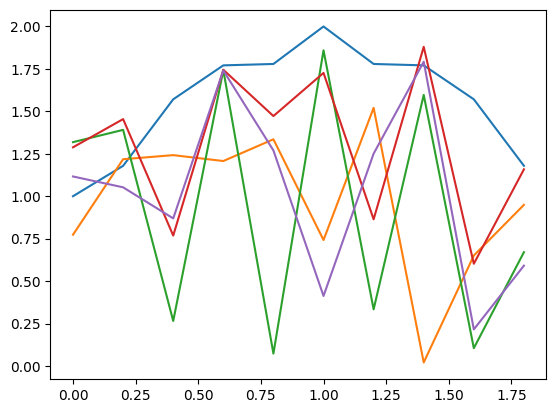

0.2761333905693521
0.2761333905693521
0.5854079065985535
0.9224700239564523
[0.783617141742405, 0.783617141742405, 0.6307524996172568, 0.5201641573281831]


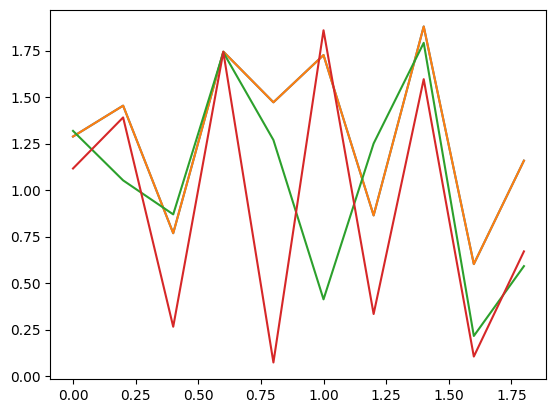

0.2761333905693521
0.2761333905693521
0.9283862217868206
0.5794917087681852
[0.783617141742405, 0.783617141742405, 0.5185683182663541, 0.6331150676187345]


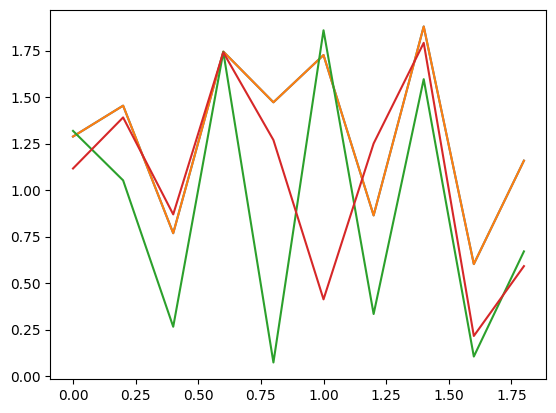

0.2779778126931639
0.9265417996630086
0.6047160468312859
0.25090905250625145
[0.7824861981700891, 0.5190647823862012, 0.6231632082041094, 0.7994186291932702]


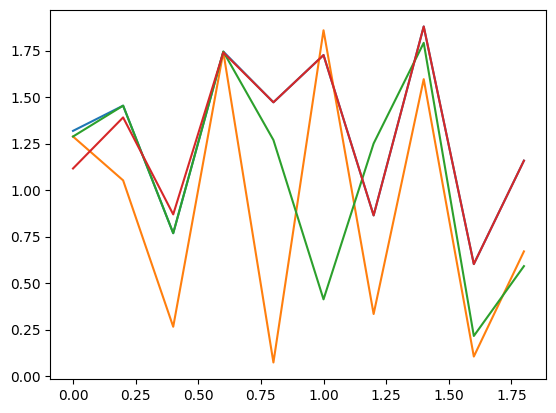

0.546498936621166
0.6580206757350069
0.9265417996630086
0.2779778126931639
[0.6466218477878994, 0.6031287876170158, 0.5190647823862012, 0.7824861981700891]


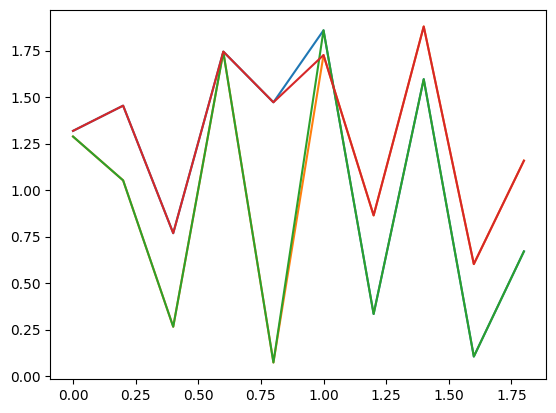

0.5597197929631315
0.3762786954650393
0.900692756053347
0.30382685630282563
[0.6411408026695715, 0.7265970208614643, 0.5261239602324937, 0.7669730034827116]


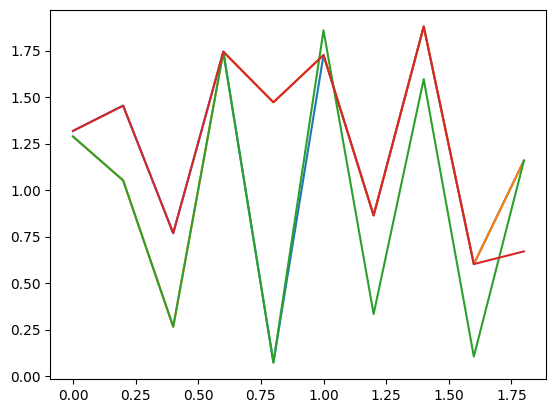

0.5597197929631315
0.5597197929631315
0.2779778126931639
0.5855688365727931
[0.6411408026695715, 0.6411408026695715, 0.7824861981700891, 0.6306884803320806]


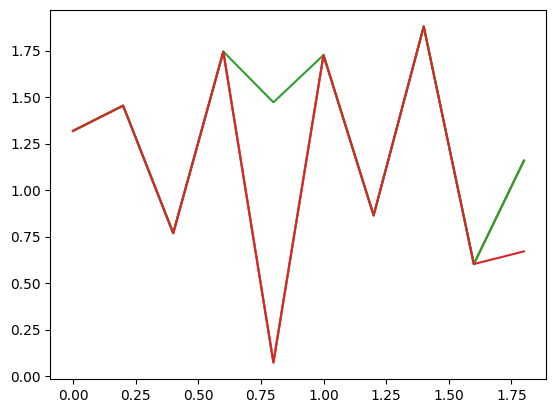

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


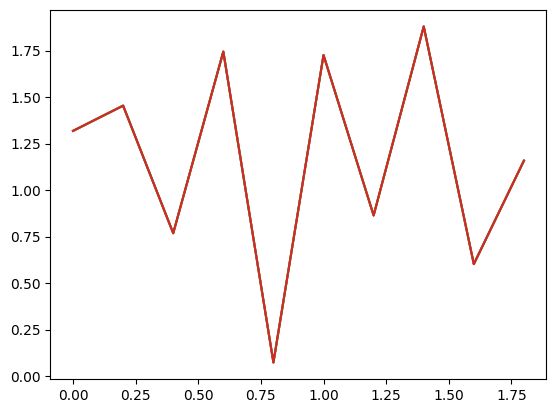

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


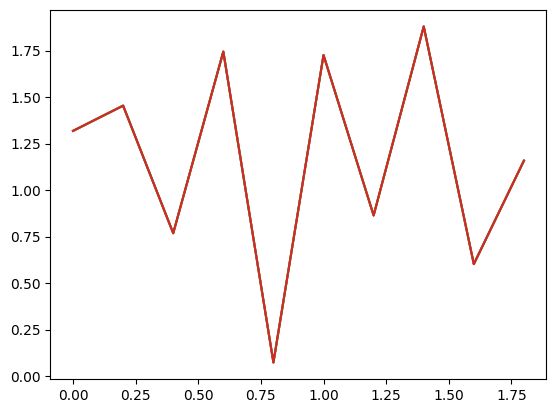

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


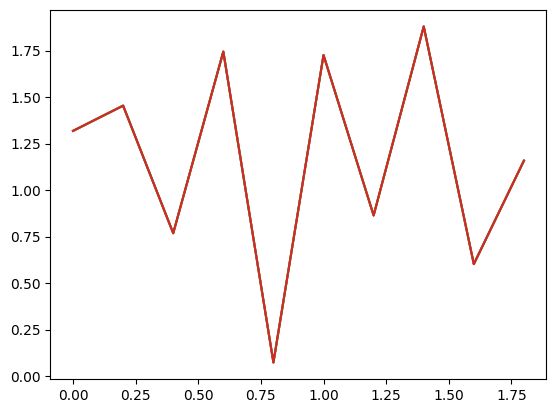

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


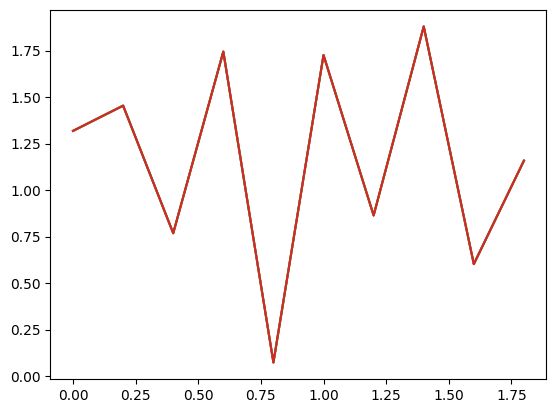

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


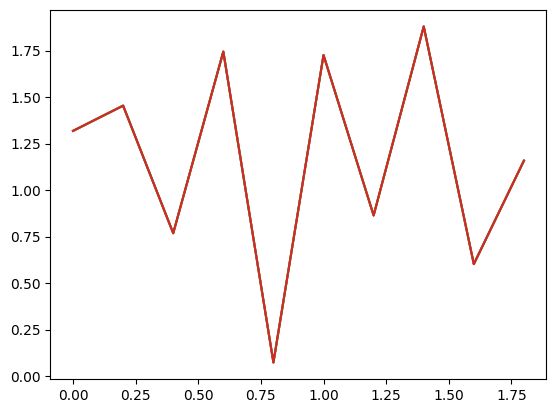

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


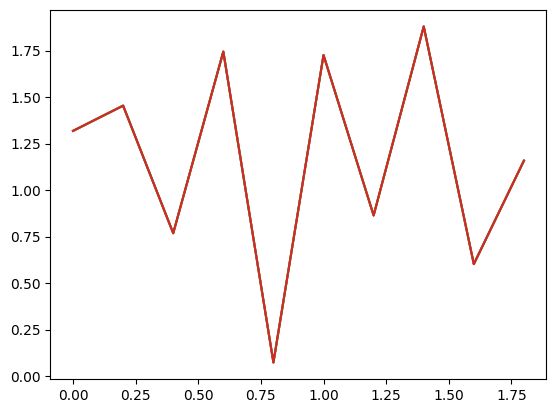

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


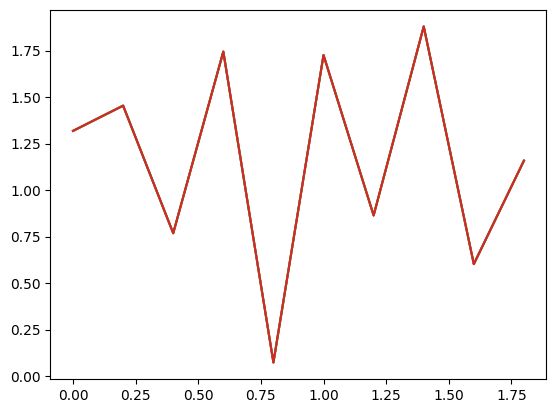

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


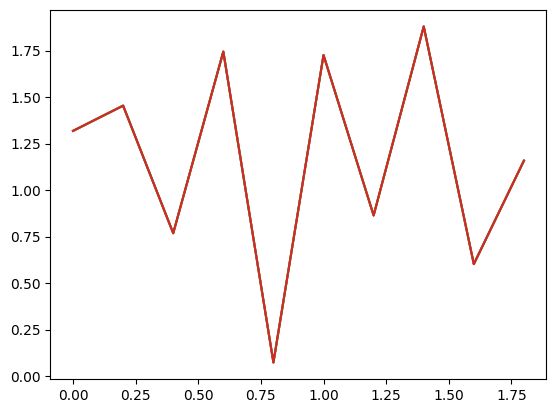

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


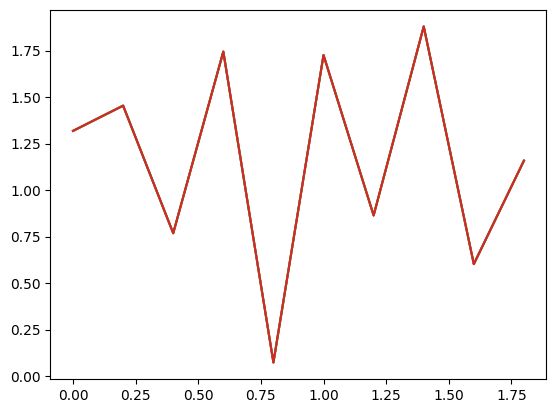

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


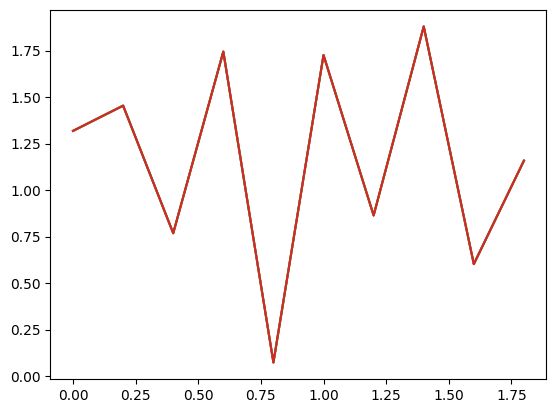

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


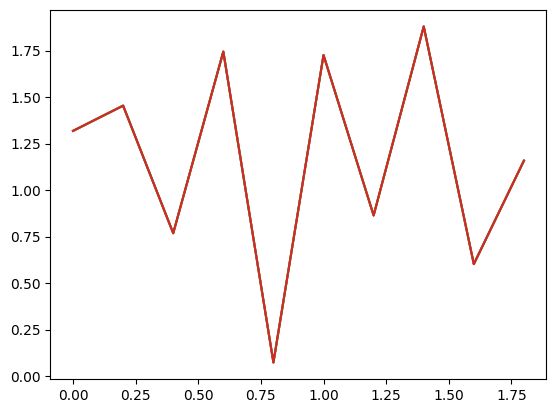

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


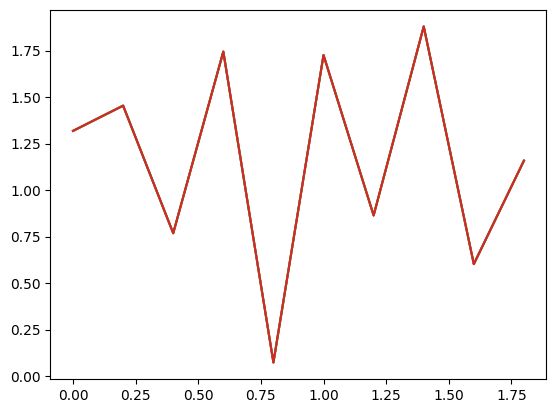

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


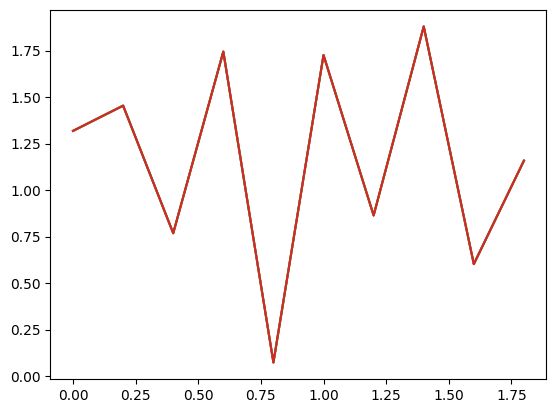

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


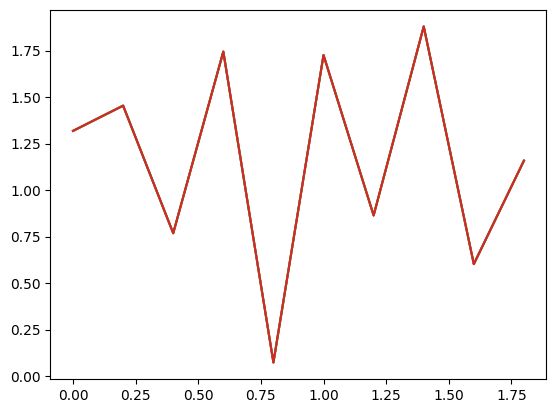

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


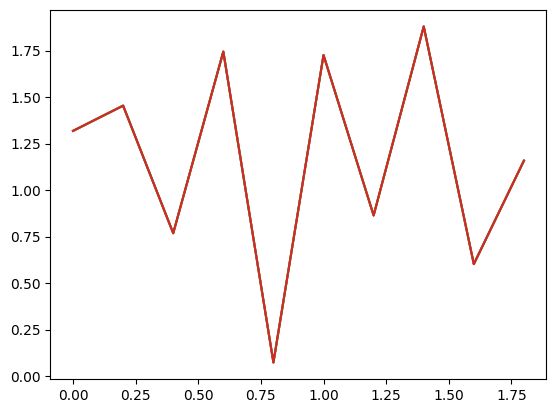

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


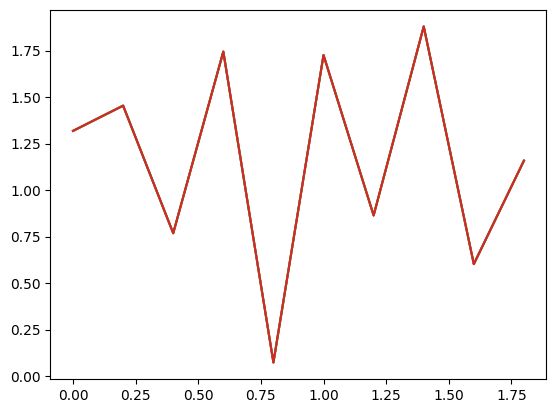

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


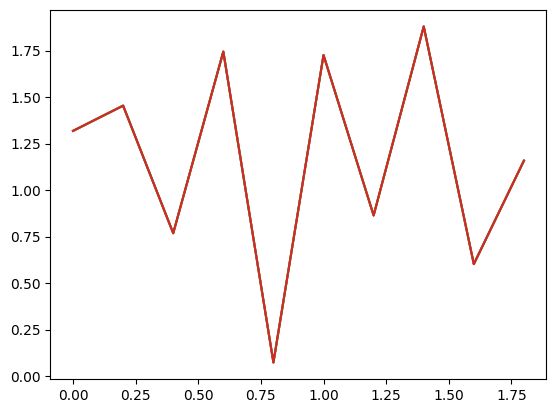

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


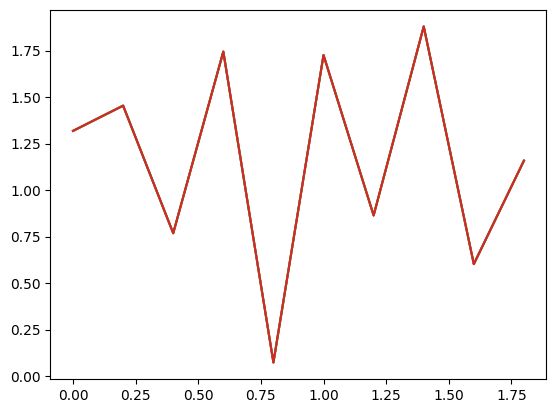

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


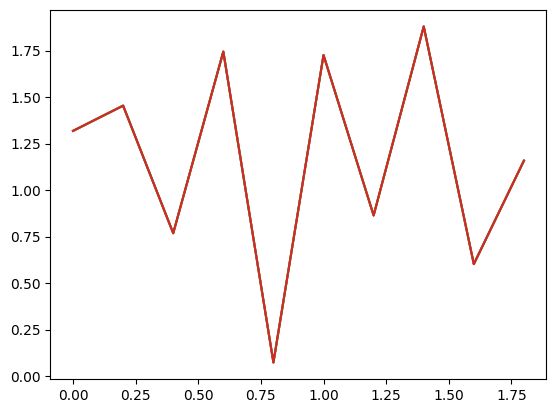

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


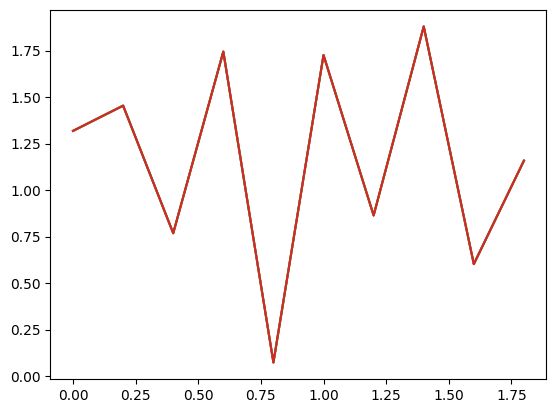

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


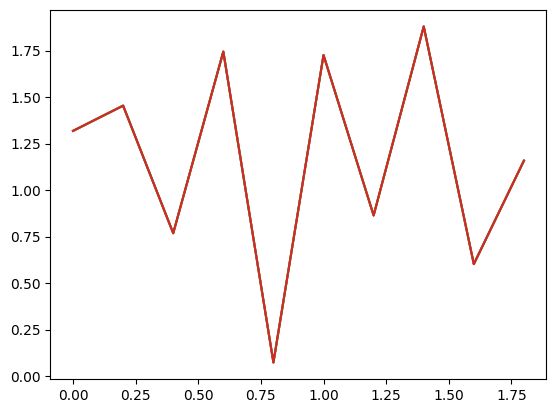

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


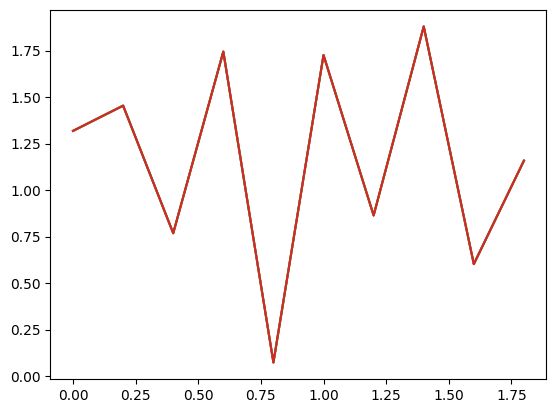

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


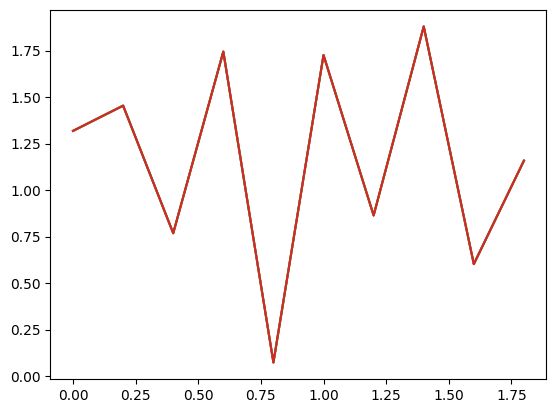

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


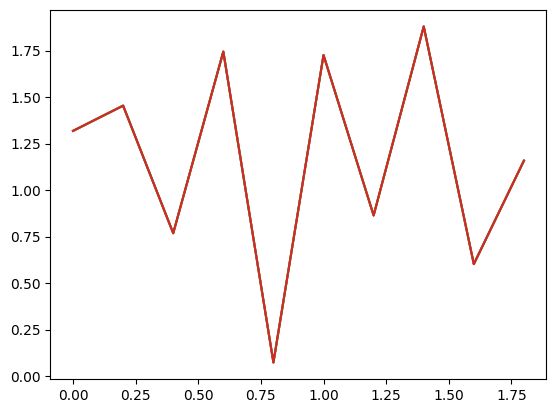

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


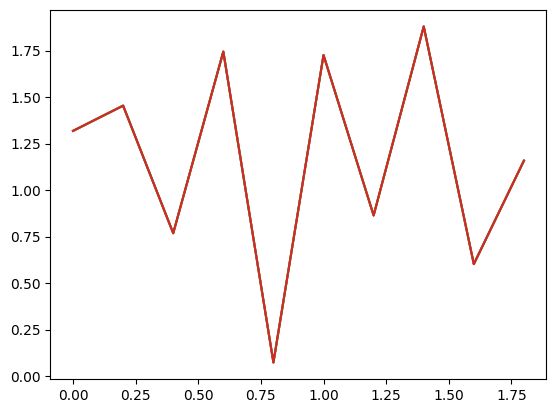

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


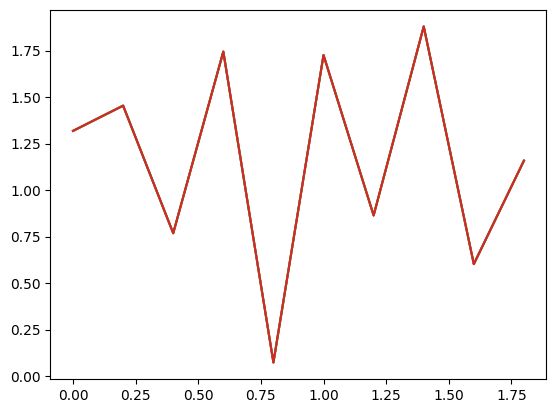

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


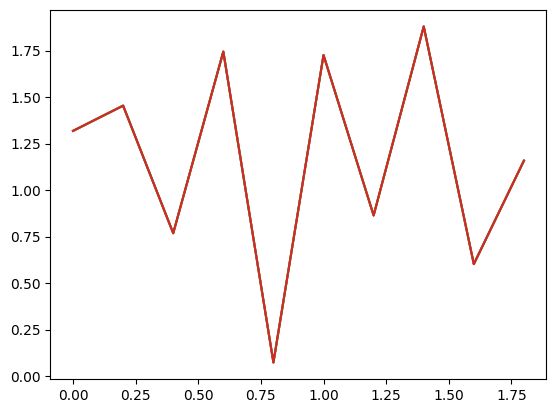

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


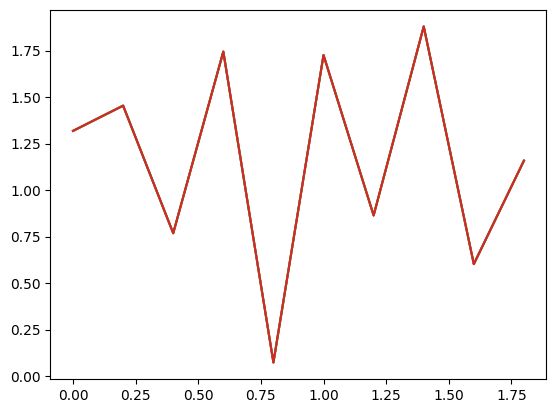

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


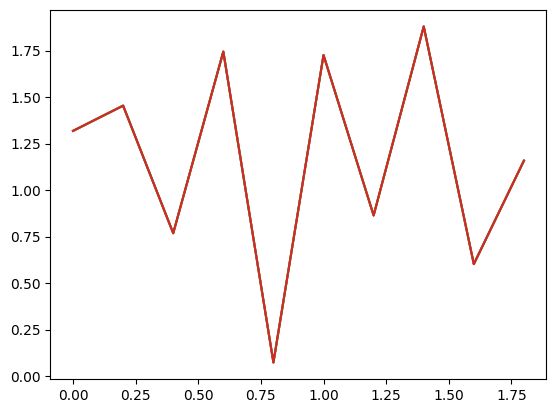

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


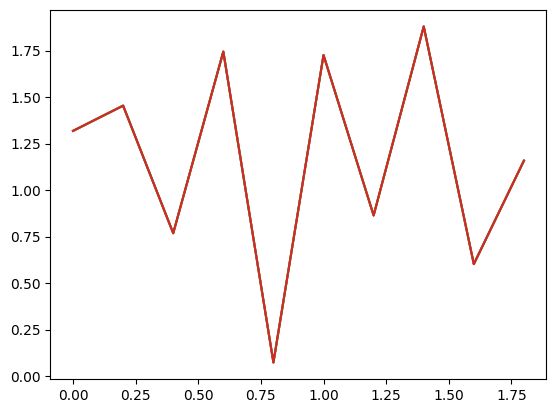

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


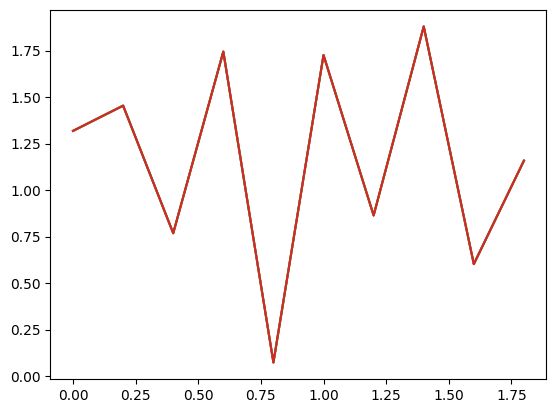

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


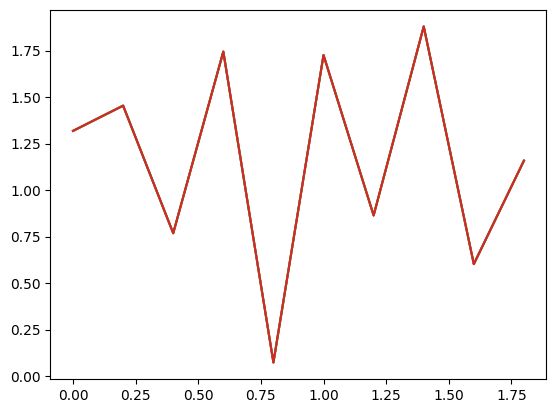

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


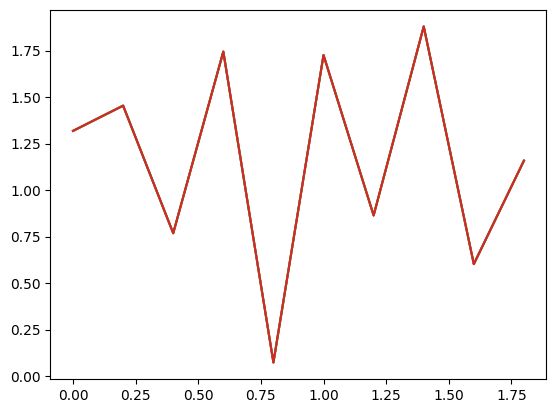

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


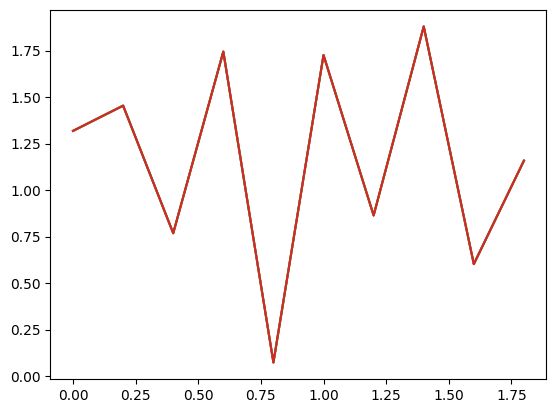

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


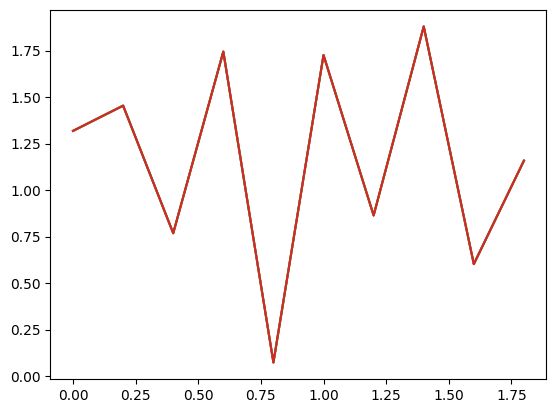

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


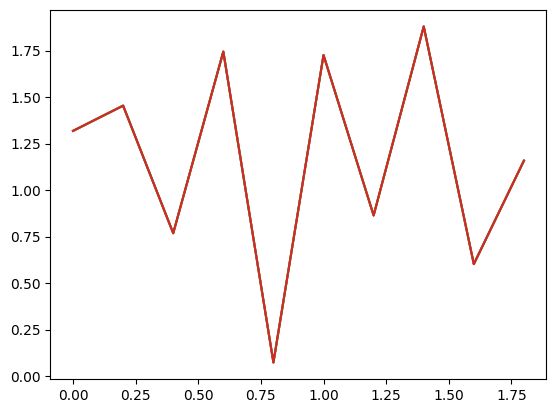

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


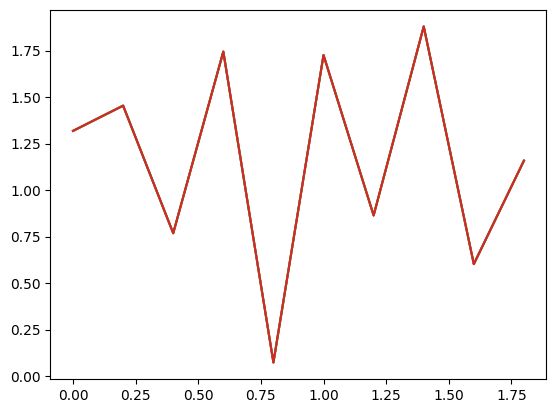

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


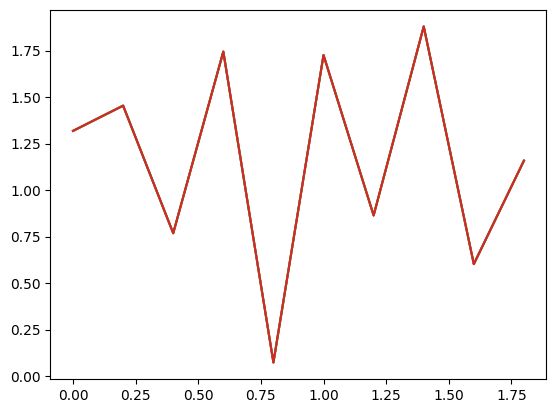

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


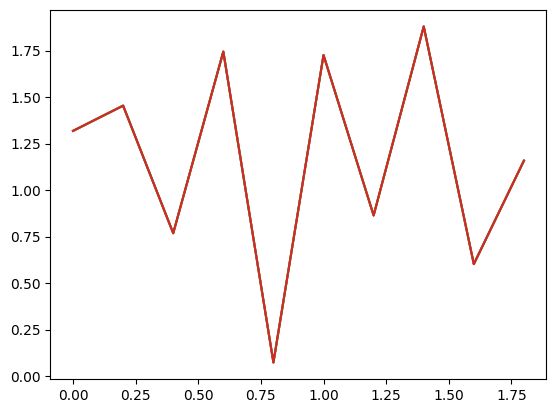

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


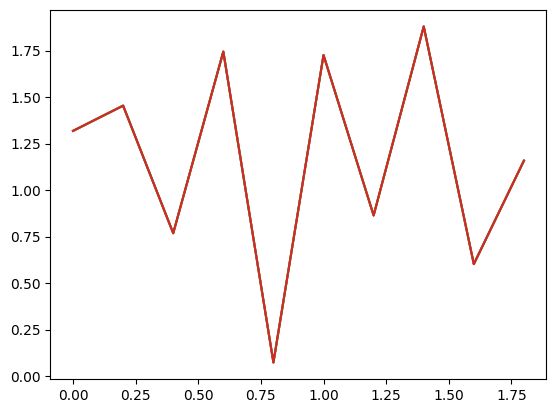

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


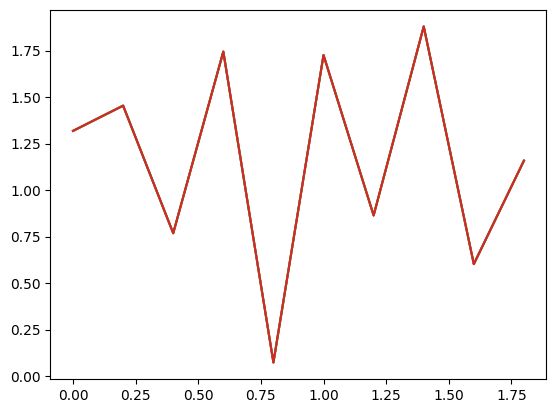

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


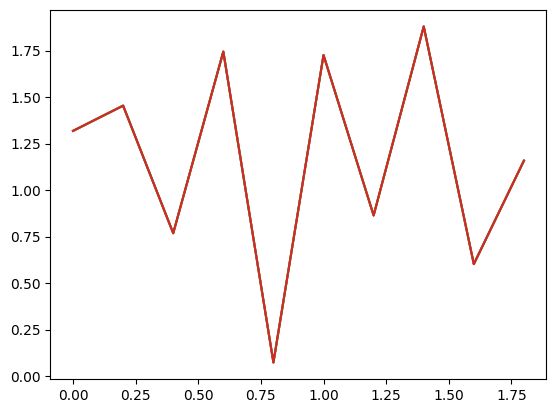

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


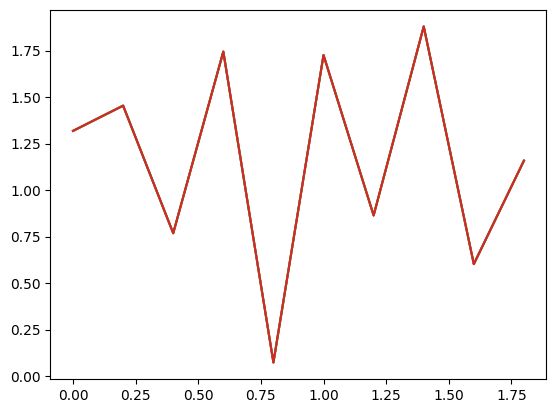

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


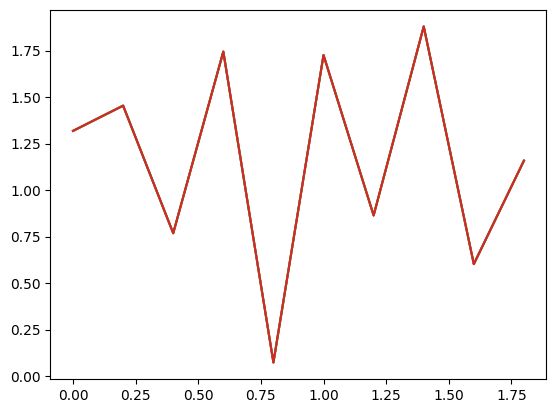

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


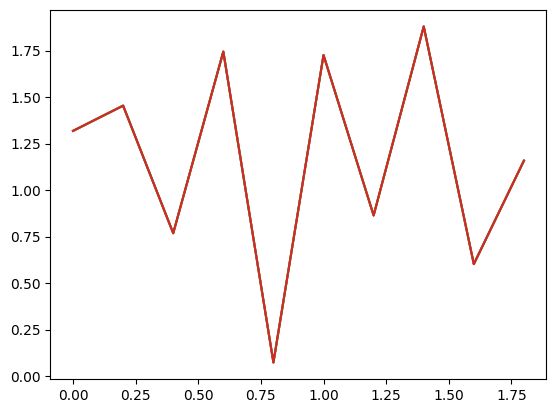

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


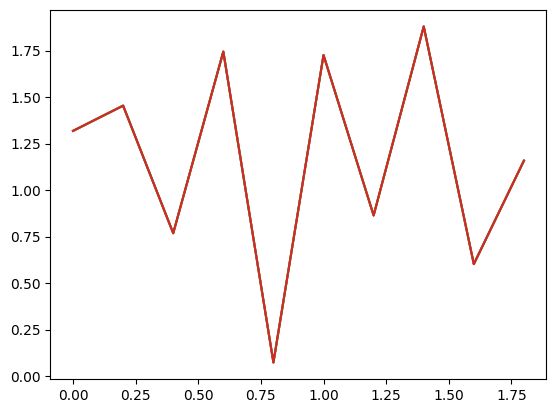

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


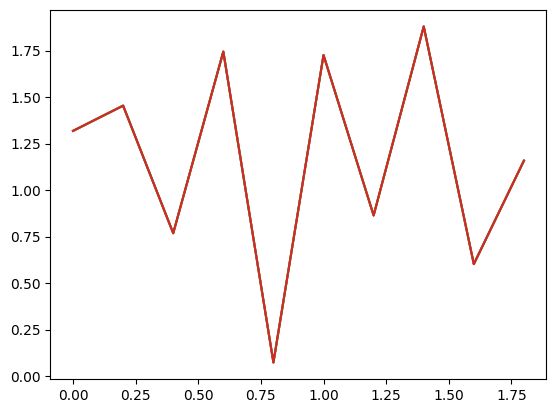

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


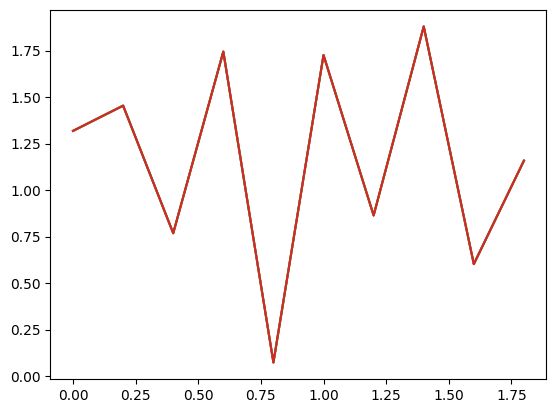

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


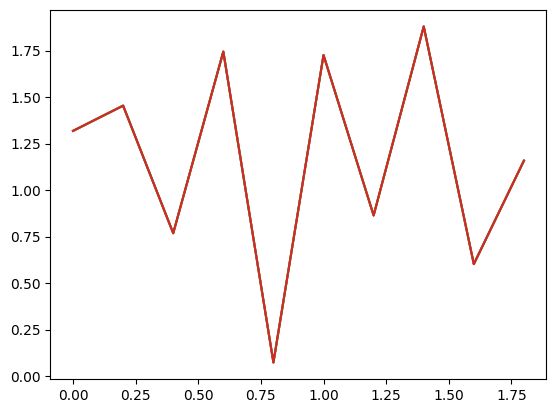

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


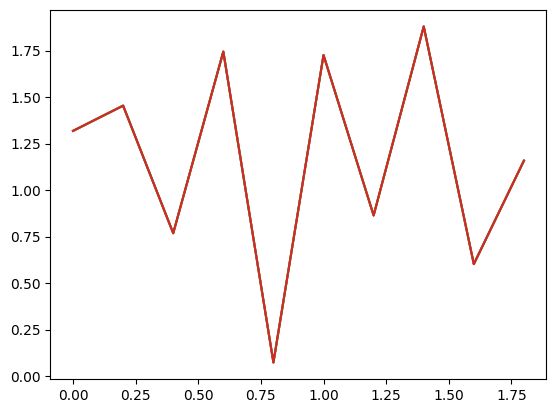

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


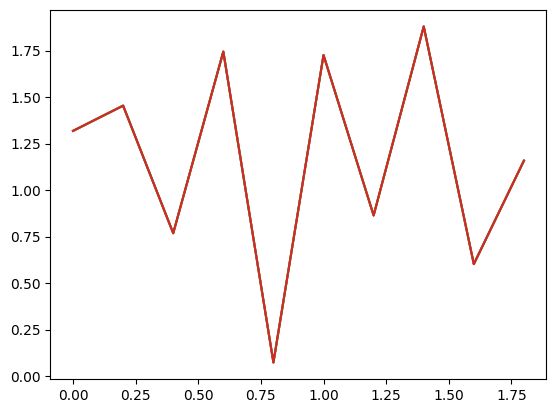

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


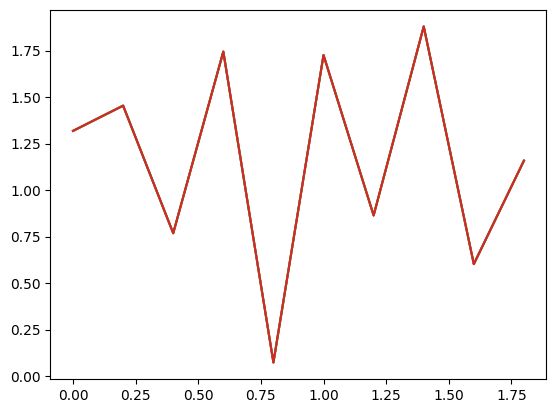

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


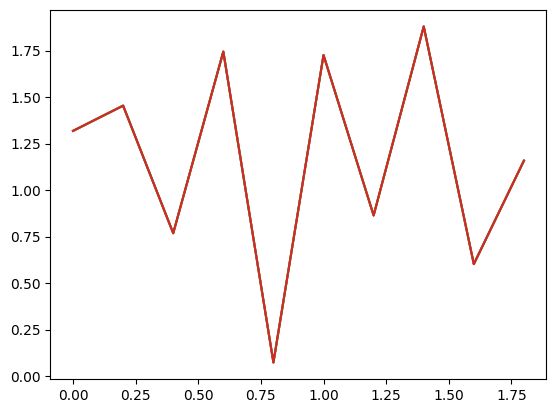

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


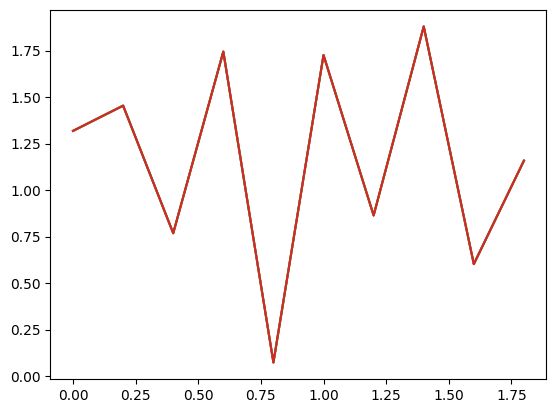

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


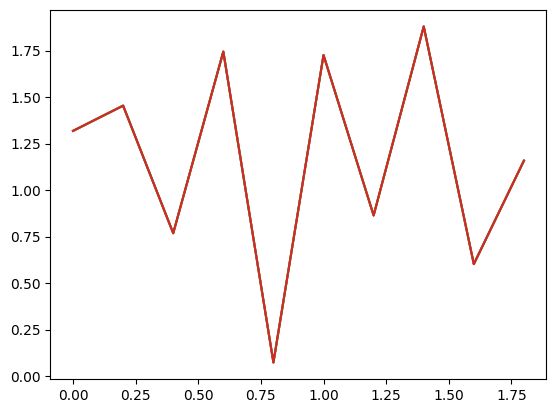

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


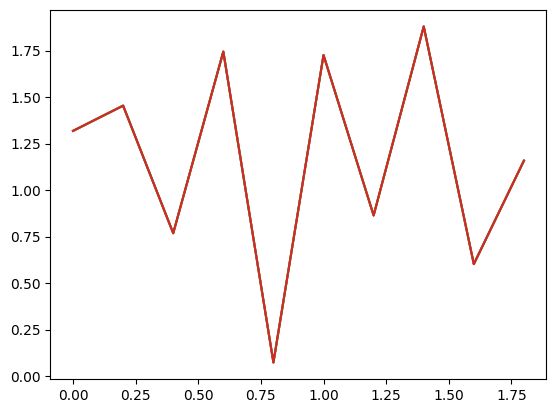

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


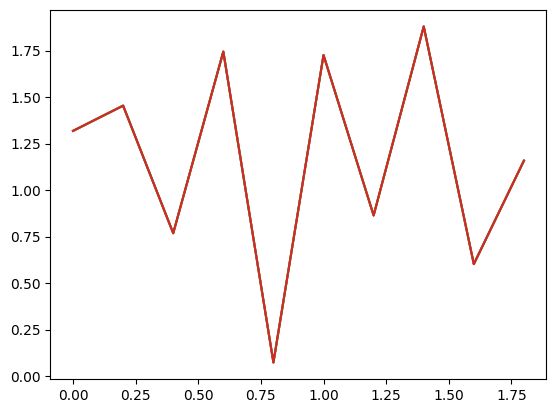

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


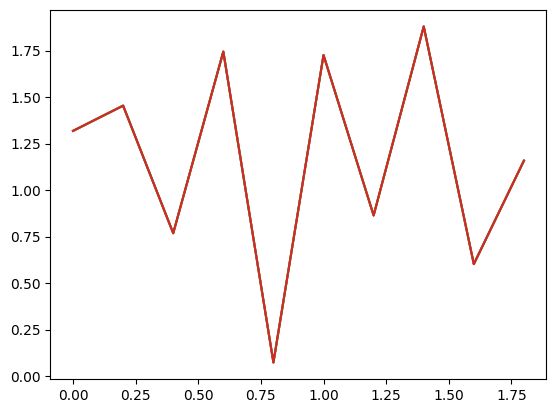

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


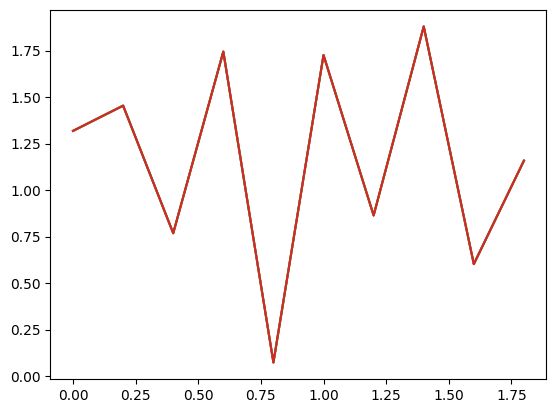

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


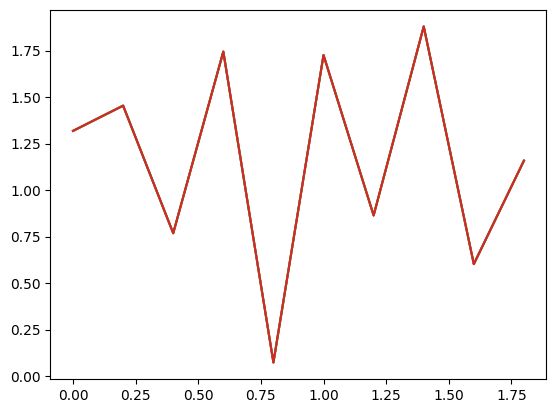

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


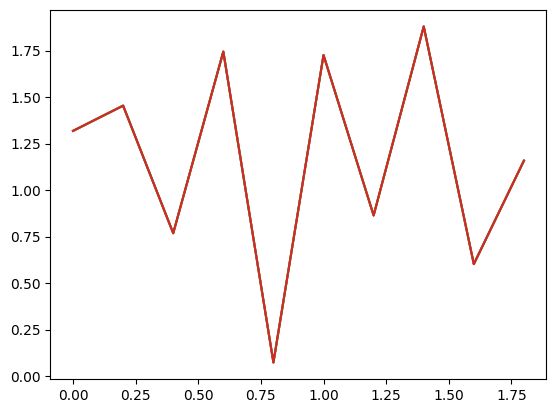

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


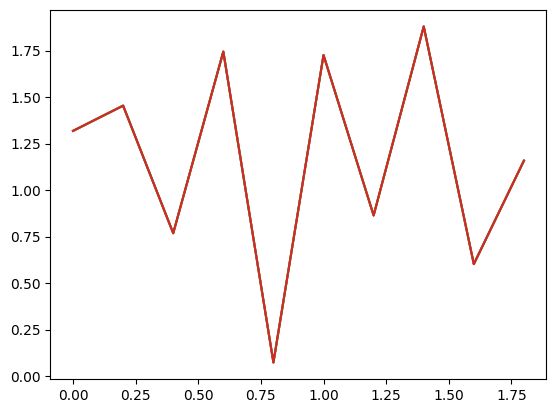

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


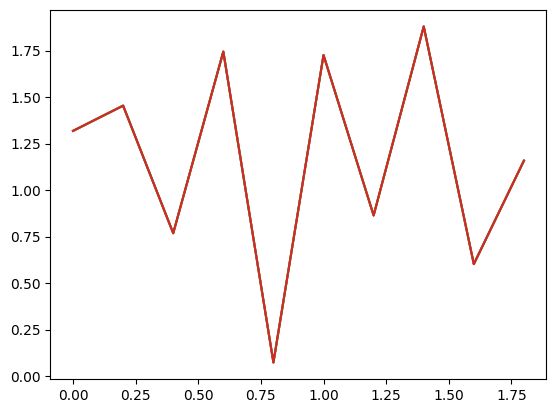

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


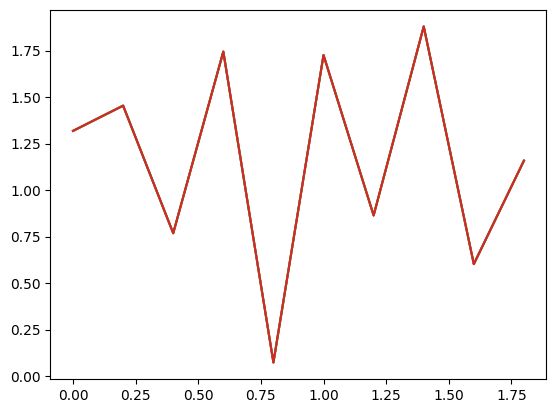

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


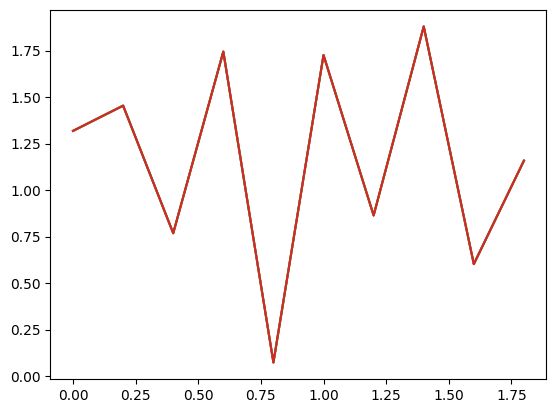

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


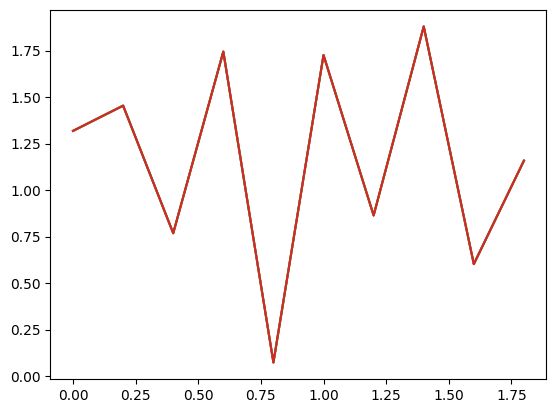

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


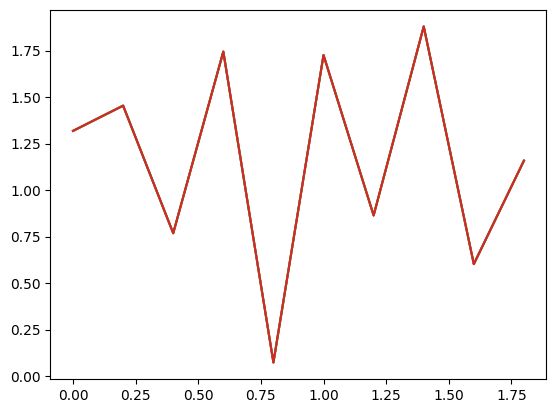

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


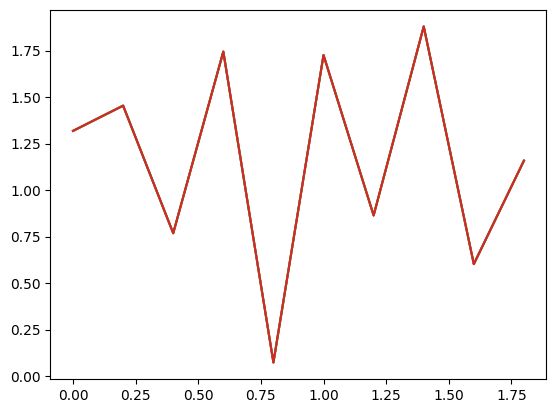

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


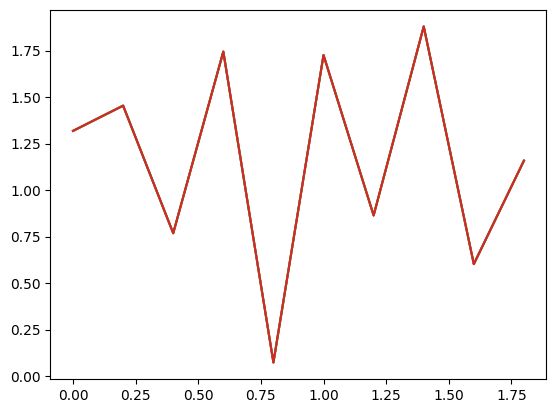

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


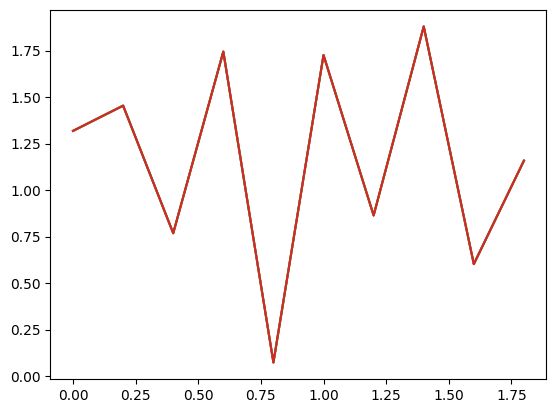

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


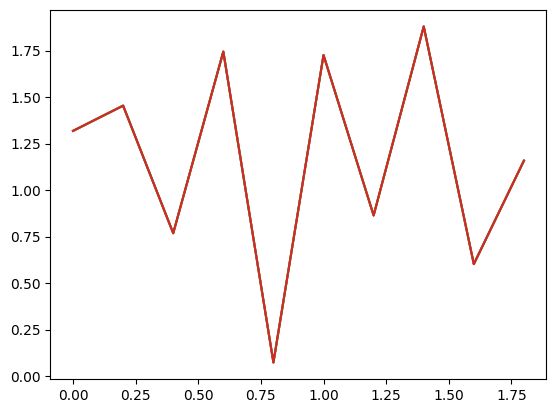

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


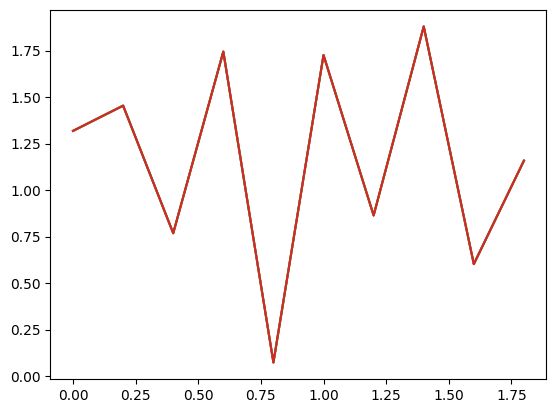

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


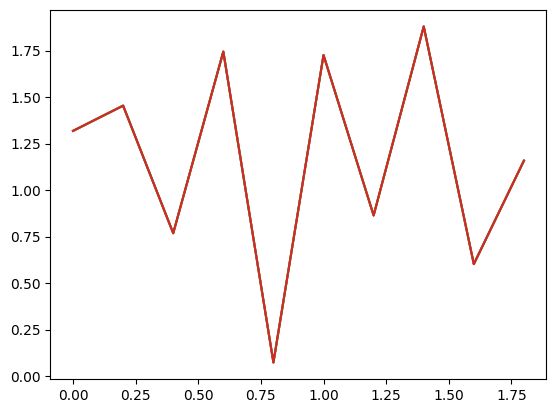

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


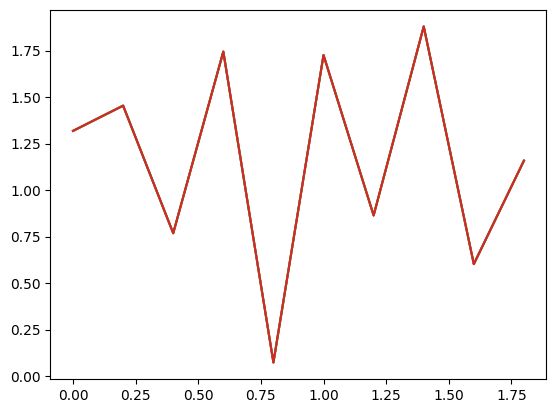

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


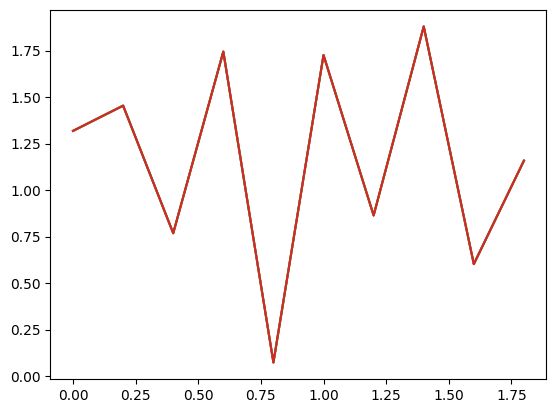

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


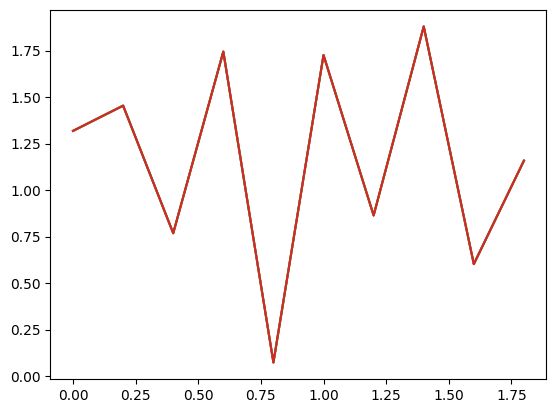

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


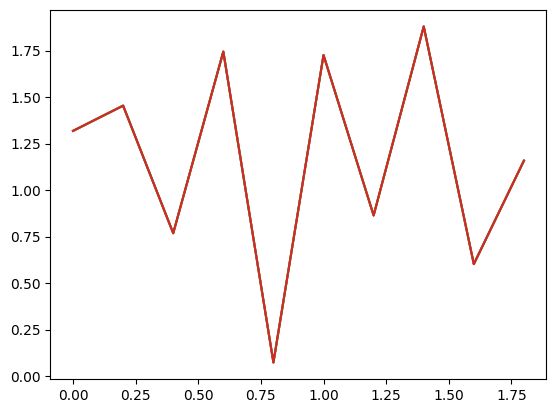

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


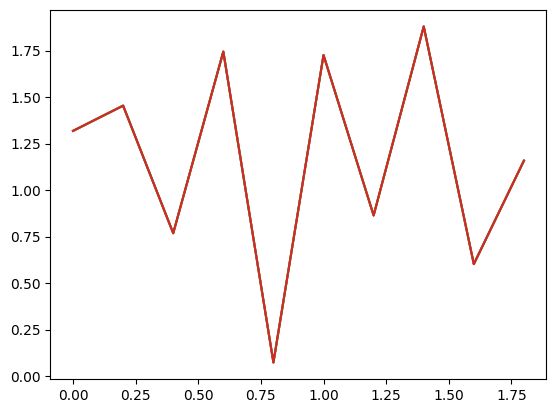

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


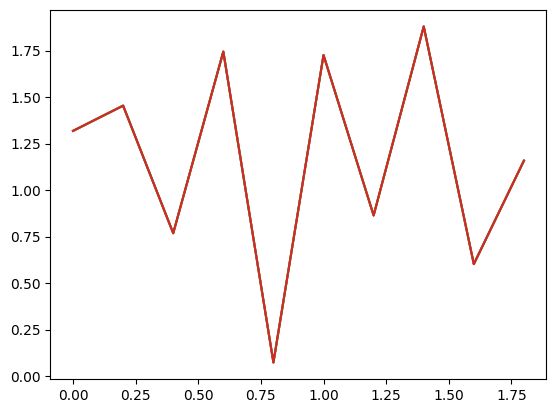

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


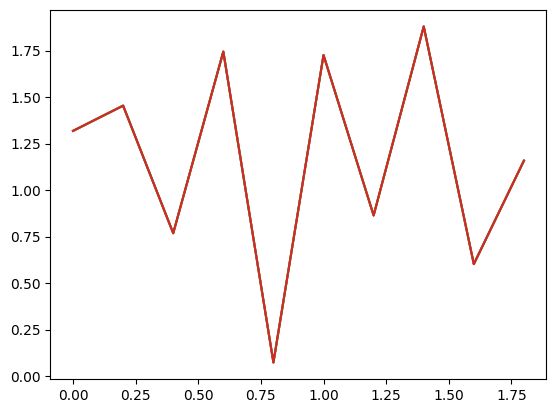

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


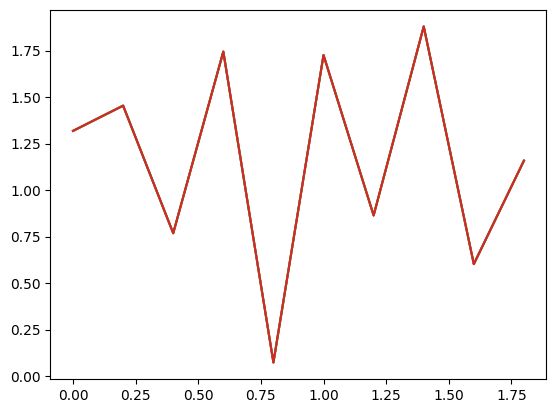

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


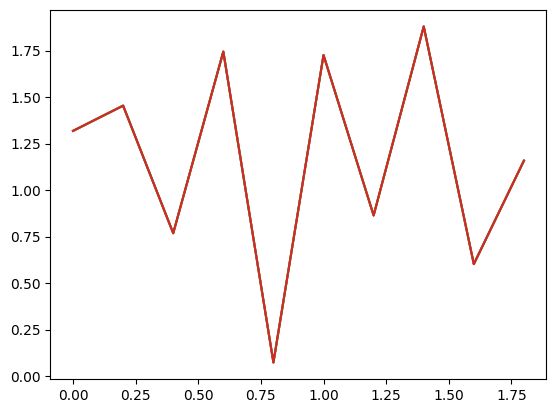

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


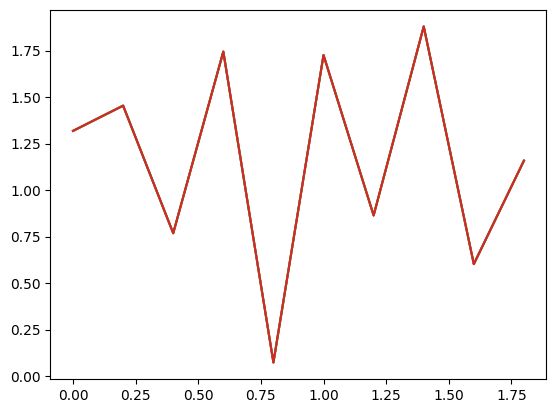

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


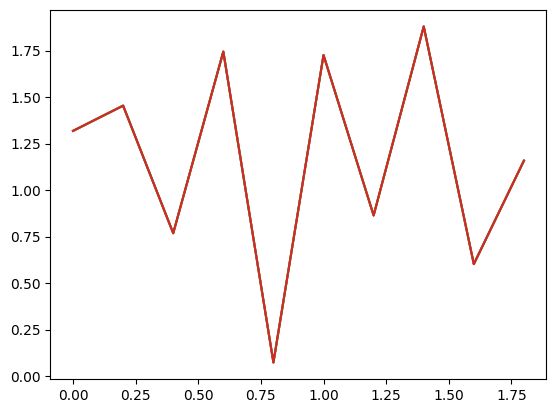

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


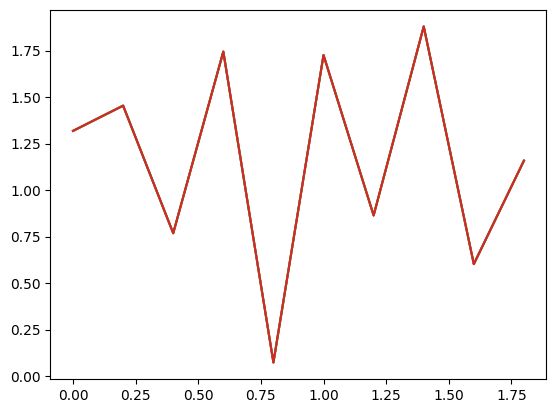

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


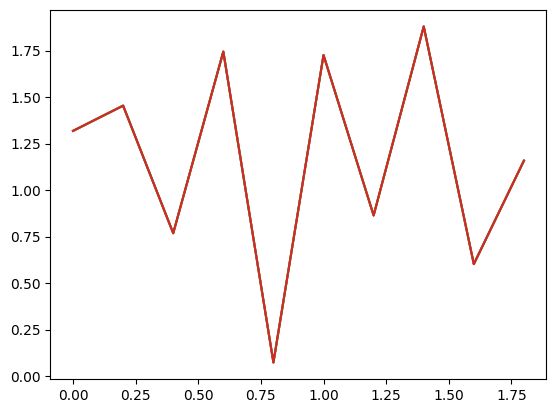

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


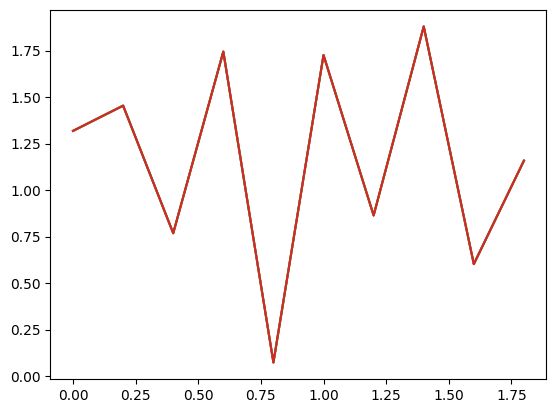

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


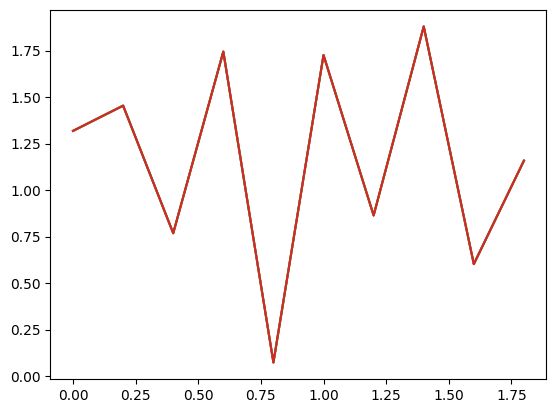

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


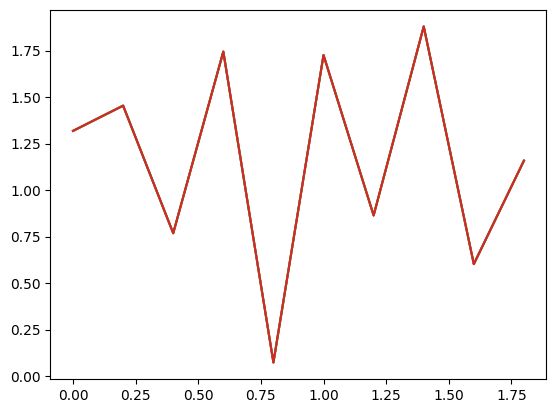

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


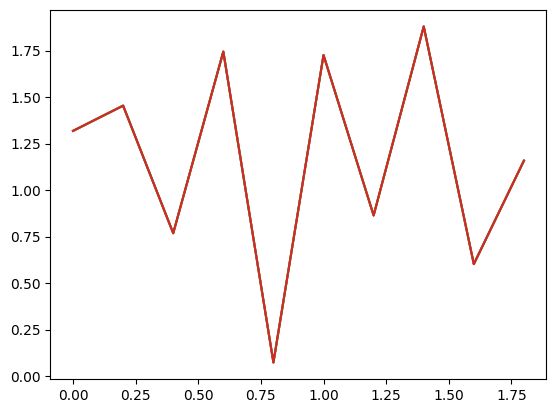

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


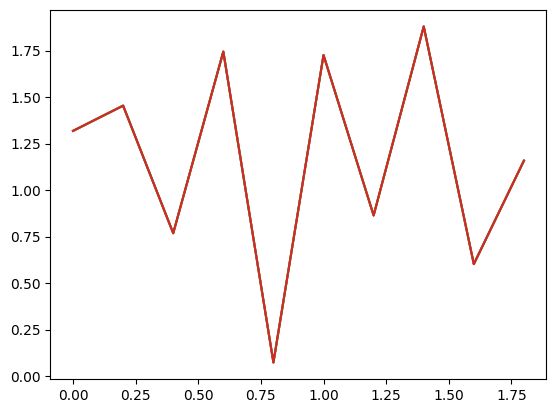

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


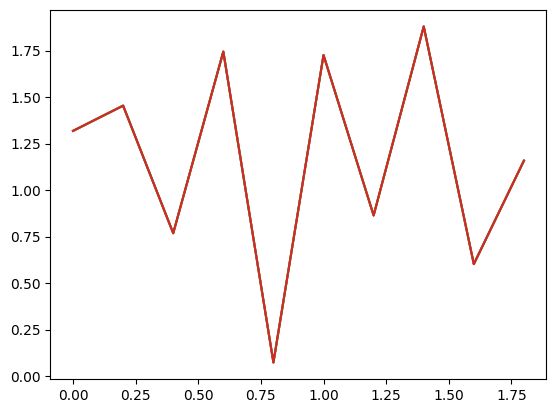

0.5597197929631315
0.5597197929631315
0.5597197929631315
0.5597197929631315
[0.6411408026695715, 0.6411408026695715, 0.6411408026695715, 0.6411408026695715]


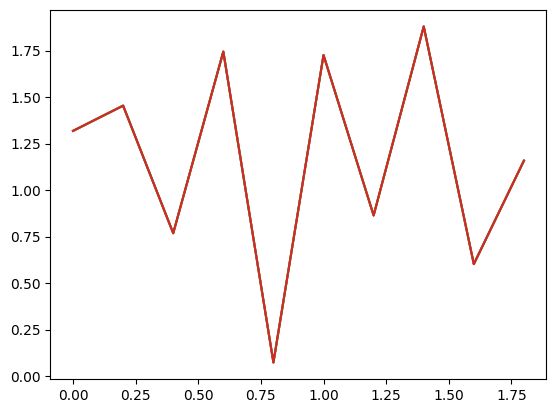

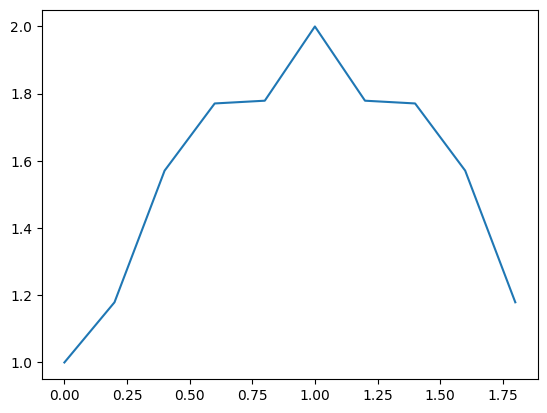

In [15]:
size_poblation = 4
ind_size = 10
generations = 100
genetic_pool = [[0,1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
prob = 0.00005

mi_funcion = GeneticAlgorithm(size_poblation,generations, ind_size, genetic_pool, prob)
mi_funcion.evolvePopulation()